In [ ]:
! pip install geopandas

In [ ]:
!pip install numpy

In [ ]:
!pip install -U scikit-criteria
!pip3 install pyowm

In [ ]:
! pip install contextily

In [ ]:
import numpy
import pandas as pd
import numpy as np
import geopandas as gpd

In [ ]:
import geopandas as gpd
import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

In [ ]:
# Mounting the Google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# California Boundaries

In [ ]:
# California cities boundary shapefile
# https://gis.data.ca.gov/datasets/CDTFA::city-and-county-boundaries?geometry=-147.431%2C31.068%2C-91.181%2C43.274

df_cities_boundaries = gpd.read_file('/content/drive/MyDrive/FinalProject_implentation/City_and_County_Boundaries-shp.zip')
df_cities_boundaries = df_cities_boundaries[df_cities_boundaries['CITY'].notna()]
df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Los Angeles County']

In [ ]:
# To display the entire contents ...... 
pd.set_option('display.max_rows', None)

In [ ]:
df_cities_boundaries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

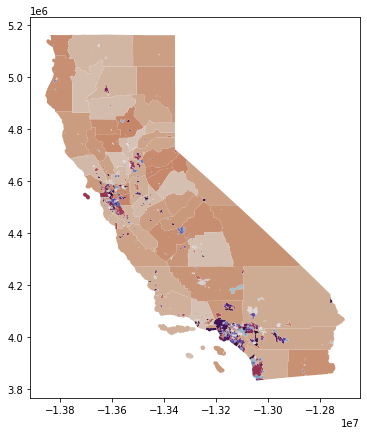

In [ ]:
#df_cities_boundaries.plot()

df_cities_boundaries.plot(figsize=(7, 7), cmap='twilight')
#fig, gax = plt.subplots(figsize=(10, 10))

#df_cities_boundaries.plot(color = 'rgb')
#plt.show()

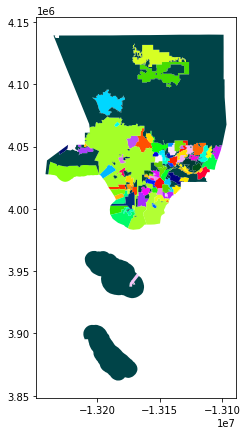

In [ ]:
rslt_df = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Los Angeles County']
rslt_df.plot(figsize=(7, 7), cmap='gist_ncar_r')

In [ ]:
la_city = df_cities_boundaries[df_cities_boundaries['CITY'] == 'Maywood']


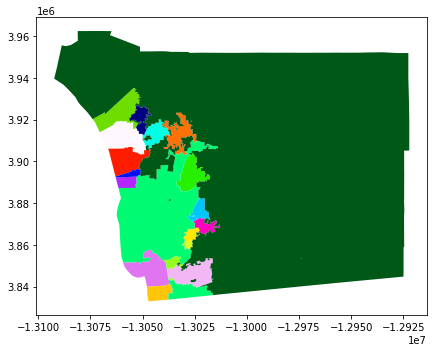

In [ ]:
rslt_df = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'San Diego County']
rslt_df.plot(figsize=(7, 7), cmap='gist_ncar_r')

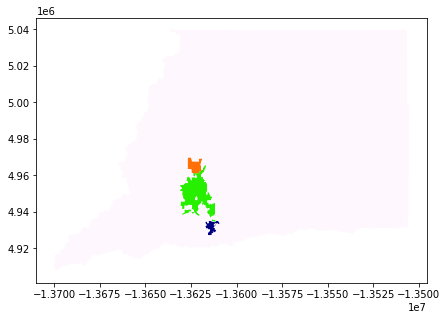

In [ ]:
rslt_df = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Shasta County']
rslt_df.plot(figsize=(7, 7), cmap='gist_ncar')

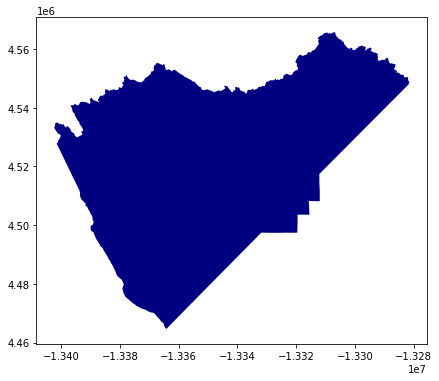

In [ ]:
rslt_df = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Mariposa County']
rslt_df.plot(figsize=(7, 7), cmap='gist_ncar')

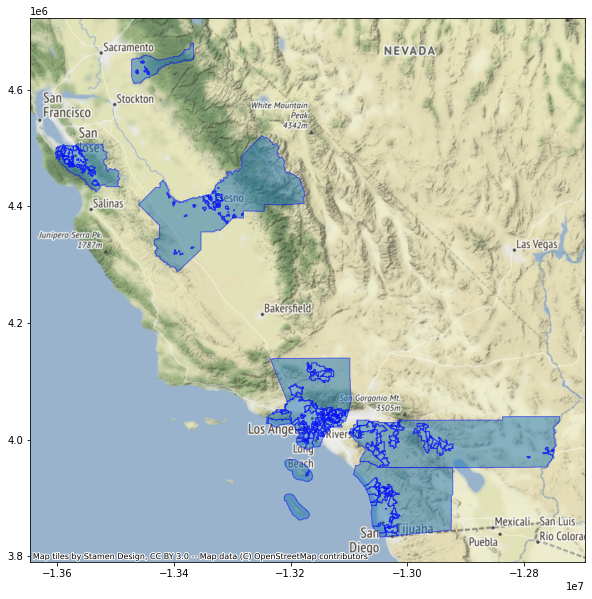

In [ ]:
# plot multiple counties together
import contextily as cx
rslt_df1 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Amador County']
rslt_df2 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'San Diego County']
rslt_df3 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Fresno County']
rslt_df4 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Riverside County']
rslt_df5 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Santa Clara County']
rslt_df6 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Los Angeles County']

out = pd.concat([rslt_df1,rslt_df2,rslt_df3,rslt_df4,rslt_df5,rslt_df6])
ax = out.plot(figsize=(10, 10), alpha=0.5, edgecolor='b')
#out.crs
#ax = df_cities_boundaries.plot(figsize=(7, 7), cmap='twilight')
cx.add_basemap(ax)

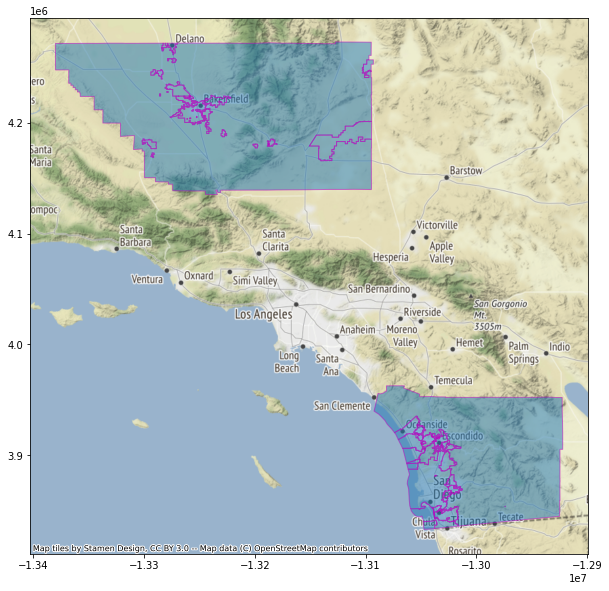

In [ ]:
# plot multiple counties together
rslt_df8 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'San Diego County']
rslt_df9 = df_cities_boundaries[df_cities_boundaries['COUNTY'] == 'Kern County']

out2 = pd.concat([rslt_df8,rslt_df9])
ax2 = out2.plot(figsize=(10, 10), alpha=0.5, edgecolor='m')
#out.crs
#ax = df_cities_boundaries.plot(figsize=(7, 7), cmap='twilight')
cx.add_basemap(ax2)

In [ ]:
# Dataset of cities of California obtained from https://simplemaps.com/
# Reading the uscitiies.csv file and constructing the dataframe

df_cities = pd.read_csv('/content/drive/MyDrive/FinalProject_implentation/uscities.csv')


In [ ]:
# Visualize the dataframe 
df_cities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [ ]:
# Extract all rows from the dataframe where state_name = California

df_california_cities = df_cities[df_cities['state_name'] == 'California']
df_california_cities.head()
df_california_cities.to_csv(r'/content/drive/MyDrive/FinalProject_implentation/density.csv', index = False)

In [ ]:
# Join the geodataframe of california
#df_california_cities_merged = df_cities_boundaries.set_index('CITY').join(df_california_cities.set_index('city'))
df_cities_boundaries.rename(columns={'CITY': 'city'}, inplace=True)

df_california_cities_merged = df_california_cities.merge(df_cities_boundaries,on =["city"],how='left', indicator=True)

# the merged dataset has column "city_ascii" 

# Renaming the column "city_ascii"  to "CITY"

#df_california_cities_merged.rename(columns={'city_ascii': 'CITY'}, inplace=True)
df_california_cities_merged.head()




,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,OBJECTID,COUNTY,COPRI,SHAPE_Leng,SHAPE_Area,geometry,_merge
0,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491,240.0,Los Angeles County,19201,629927.649063,1.983350e+09,"POLYGON ((-13177364.151 4019274.177, -13177364...",both
1,San Francisco,San Francisco,CA,California,6075,San Francisco,37.7562,-122.4430,3592294,7256,polygon,False,True,America/Los_Angeles,1,94130 94131 94132 94133 94134 94109 94108 9410...,1840021543,370.0,San Francisco County,38001,203595.116213,9.636207e+08,"MULTIPOLYGON (((-13685587.506 4539292.679, -13...",both
2,San Diego,San Diego,CA,California,6073,San Diego,32.8312,-117.1225,3220118,1686,polygon,False,True,America/Los_Angeles,1,92109 92108 92103 92111 92154 92110 92115 9214...,1840021990,367.0,San Diego County,37008,444298.595461,1.536273e+09,"MULTIPOLYGON (((-13016103.140 3843864.624, -13...",both
3,Riverside,Riverside,CA,California,6065,Riverside,33.9381,-117.3948,2107852,1574,polygon,False,True,America/Los_Angeles,1,92508 92503 92501 92505 92504 92507 92506 9250...,1840020551,352.0,Riverside County,33009,125771.979655,3.076189e+08,"POLYGON ((-13059305.222 4013318.743, -13059305...",both
4,Sacramento,Sacramento,CA,California,6067,Sacramento,38.5667,-121.4683,1898019,2029,polygon,False,True,America/Los_Angeles,1,95820 95838 95832 95833 95831 95834 95835 9581...,1840021491,360.0,Sacramento County,34003,198235.431439,4.270073e+08,"POLYGON ((-13523573.510 4675091.760, -13523562...",both


In [ ]:
'''
# we want to visualize a column on map 
column_map = 'population'
# setting the range for the choropleth
vmin, vmax = 120, 220
# creating figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# Remove the axis
ax.axis('off')
# creating Map
df_california_cities_merged.plot(column=column_map, cmap='magma', linewidth=0.9, ax=ax, edgecolor='0.9')
'''

"\n# we want to visualize a column on map \ncolumn_map = 'population'\n# setting the range for the choropleth\nvmin, vmax = 120, 220\n# creating figure and axes for Matplotlib\nfig, ax = plt.subplots(1, figsize=(10, 10))\n\n# Remove the axis\nax.axis('off')\n# creating Map\ndf_california_cities_merged.plot(column=column_map, cmap='magma', linewidth=0.9, ax=ax, edgecolor='0.9')\n"

# Vegetation

In [ ]:
#  use the wget terminal command to download a file from a url. 
# use unzip to unzip the archive into a folder of the same name. 
# The -o option is used to overwrite the folder if it already exists 
# Use ls to see the contents of the folder
!wget https://ecoengine.berkeley.edu/data/Wieslander_Statewide_CANAD83.zip -O vegetation.zip
!unzip -o vegetation.zip -d vegetation
!ls vegetation

--2021-05-11 08:05:31--  https://ecoengine.berkeley.edu/data/Wieslander_Statewide_CANAD83.zip
Resolving ecoengine.berkeley.edu (ecoengine.berkeley.edu)... 128.32.213.154
Connecting to ecoengine.berkeley.edu (ecoengine.berkeley.edu)|128.32.213.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205883811 (196M) [application/zip]
Saving to: ‘vegetation.zip’

vegetation.zip      100%[===================>] 196.35M  39.8MB/s    in 5.4s    

2021-05-11 08:05:36 (36.1 MB/s) - ‘vegetation.zip’ saved [205883811/205883811]

Archive:  vegetation.zip
   creating: vegetation/Wieslander_Statewide_CANAD83/
  inflating: vegetation/Wieslander_Statewide_CANAD83/Wieslander_Statewide_CANAD83.dbf  
  inflating: vegetation/Wieslander_Statewide_CANAD83/Wieslander_Statewide_CANAD83.prj  
  inflating: vegetation/Wieslander_Statewide_CANAD83/Wieslander_Statewide_CANAD83.sbn  
  inflating: vegetation/Wieslander_Statewide_CANAD83/Wieslander_Statewide_CANAD83.sbx  
  inflating: vegetation

In [ ]:
# Vegetation Data
# path to shapefile
filepath = "/content/drive/MyDrive/FinalProject_implentation/vegetation/Wieslander_Statewide_CANAD83/Wieslander_Statewide_CANAD83.shp"

# Read file using gpd.read_file()
data = gpd.read_file(filepath)

In [ ]:
data = data.replace({'\r\n': ''}, regex=True)

In [ ]:
data.head()

,VTM_ID,VTMQUAD_ID,AREA_HA,AREA_M2,PERIM_M,WHR1,WHR1_TYPE,WHR2,WHR2_TYPE,MCV1_1995,MCV2_1995,MCV1_2009,MCV2_2009,MCV1A2009,SP1,SP1_NAME,SP2,SP2_NAME,SP3,SP3_NAME,SP4,SP4_NAME,SP5,SP5_NAME,SP6,SP6_NAME,SP7,SP7_NAME,SP8,SP8_NAME,SP9,SP9_NAME,CH_ANGLE,CH_COLOR,VEGSTRING,COMMENTS,CalVeg1,CV1_NAME,CalVeg2,CV2_NAME,VTM_COLOR,VTM_TYPE,geometry
0,1,290,2.883996,28839.955495,1054.292095,BOP,Blue Oak-Foothill Pine,None,None,Quercus douglasii-Pinus sabiniana Provisional ...,None,Quercus douglasii-Pinus sabiniana Provisional ...,None,None,Dp,Pinus sabiniana,D',Quercus douglasii,Bh2,Bromus hordeaceus,None,None,None,None,None,None,None,None,None,None,None,None,0,None,Pinus sabinianaQuercus douglasiiBromus hordeac...,None,None,None,None,None,None,None,"POLYGON ((-108146.642 -84629.692, -108103.152 ..."
1,2,1,1.214535,12145.354669,516.795181,COW,Coastal Oak Woodland,None,None,Quercus agrifolia-Quercus douglasii Provisiona...,None,Quercus agrifolia-Quercus douglasii Provisiona...,None,Quercus agrifolia-Quercus douglasii Association,A,Quercus agrifolia,D',Quercus douglasii,Bh2,Bromus hordeaceus,None,None,None,None,None,None,None,None,None,None,None,None,0,None,Quercus agrifoliaQuercus douglasiiBromus horde...,None,None,None,None,None,None,None,"POLYGON ((-111181.503 -111958.328, -111179.629..."
2,3,2,15.093523,150935.231944,1754.472204,BOW,Blue Oak Woodland,None,None,Blue Oak Alliance,None,Quercus douglasii Woodland Alliance,None,None,D',Quercus douglasii,Bh2,Bromus hordeaceus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,Quercus douglasiiBromus hordeaceus0,None,None,None,None,None,None,None,"POLYGON ((-99231.277 -112388.975, -99508.256 -..."
3,4,3,4.003626,40036.261078,1507.388357,COW,Coastal Oak Woodland,None,None,Coast Live Oak Alliance,None,Quercus agrifolia Woodland Alliance,None,Quercus agrifolia-Umbellularia californica Ass...,A,Quercus agrifolia,L',Umbellularia californica,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,Quercus agrifoliaUmbellularia californica0,None,None,None,None,None,None,None,"POLYGON ((-109209.621 -112290.439, -109294.941..."
4,5,4,9.156008,91560.075986,1534.486302,VOW,Valley Oak Woodland,MHW,Montane Hardwood,Quercus agrifolia-Quercus lobata Provisional A...,California Buckeye Alliance,Quercus agrifolia-Quercus lobata Provisional A...,Aesculus californica Woodland Alliance,None,V,Quercus lobata,A,Quercus agrifolia,H2,Aesculus californica,None,None,None,None,None,None,None,None,None,None,None,None,0,None,Quercus lobataQuercus agrifoliaAesculus califo...,None,None,None,None,None,None,None,"POLYGON ((-108552.277 -111986.809, -108615.767..."


In [ ]:
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [ ]:
data.columns

Index(['VTM_ID', 'VTMQUAD_ID', 'AREA_HA', 'AREA_M2', 'PERIM_M', 'WHR1',
       'WHR1_TYPE', 'WHR2', 'WHR2_TYPE', 'MCV1_1995', 'MCV2_1995', 'MCV1_2009',
       'MCV2_2009', 'MCV1A2009', 'SP1', 'SP1_NAME', 'SP2', 'SP2_NAME', 'SP3',
       'SP3_NAME', 'SP4', 'SP4_NAME', 'SP5', 'SP5_NAME', 'SP6', 'SP6_NAME',
       'SP7', 'SP7_NAME', 'SP8', 'SP8_NAME', 'SP9', 'SP9_NAME', 'CH_ANGLE',
       'CH_COLOR', 'VEGSTRING', 'COMMENTS', 'CalVeg1', 'CV1_NAME', 'CalVeg2',
       'CV2_NAME', 'VTM_COLOR', 'VTM_TYPE', 'geometry'],
      dtype='object')

In [ ]:
#data['geometry']

In [ ]:
#data.bounds


In [ ]:
#data.boundary

In [ ]:
col = data.columns.tolist()
drop_col = ['VTM_ID', 'VTMQUAD_ID','AREA_M2', 
            'PERIM_M', 'WHR2', 'WHR2_TYPE', 
            'MCV1_1995', 'MCV2_1995', 'MCV1_2009', 'MCV2_2009', 'MCV1A2009', 
            'SP1', 'SP1_NAME', 'SP2', 'SP2_NAME', 'SP3', 'SP3_NAME', 'SP4', 
            'SP4_NAME', 'SP5', 'SP5_NAME', 'SP6', 'SP6_NAME', 'SP7', 'SP7_NAME', 
            'SP8', 'SP8_NAME', 'SP9', 'SP9_NAME', 'CH_ANGLE', 'CH_COLOR', 
            'VEGSTRING', 'COMMENTS', 'CalVeg1', 'CV1_NAME', 'CalVeg2', 'CV2_NAME', 
            'VTM_COLOR', 'VTM_TYPE']
data = data.drop(columns=drop_col)
data.head()


,AREA_HA,WHR1,WHR1_TYPE,geometry
0,2.883996,BOP,Blue Oak-Foothill Pine,"POLYGON ((-108146.642 -84629.692, -108103.152 ..."
1,1.214535,COW,Coastal Oak Woodland,"POLYGON ((-111181.503 -111958.328, -111179.629..."
2,15.093523,BOW,Blue Oak Woodland,"POLYGON ((-99231.277 -112388.975, -99508.256 -..."
3,4.003626,COW,Coastal Oak Woodland,"POLYGON ((-109209.621 -112290.439, -109294.941..."
4,9.156008,VOW,Valley Oak Woodland,"POLYGON ((-108552.277 -111986.809, -108615.767..."


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


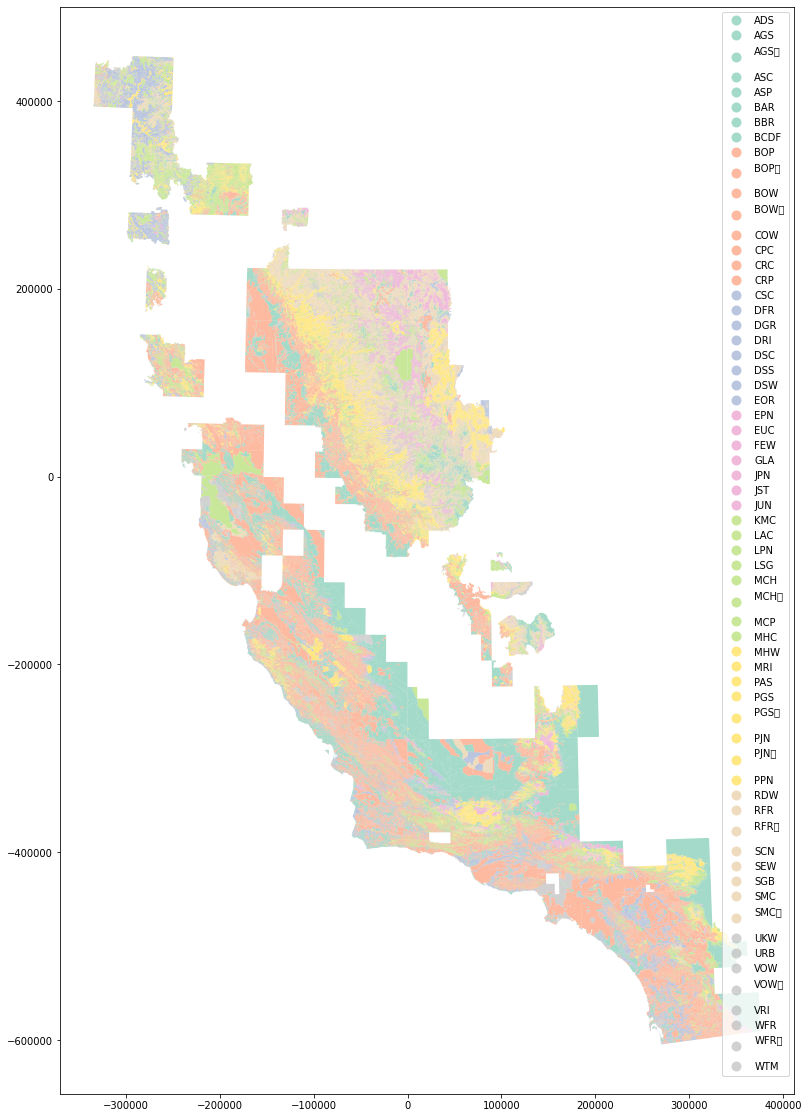

In [ ]:
ax = data.plot(figsize=(20,20), alpha=0.6, cmap='Set2', column='WHR1', legend=True)

In [ ]:
# Save the plot
ax.figure.savefig('/content/drive/MyDrive/FinalProject_implentation/vegetation.png')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


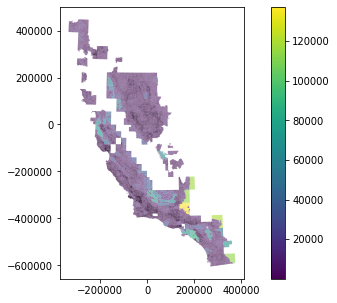

In [ ]:
#then pass the area column as an argument
ax = data.plot(figsize=(10,5), alpha=0.6, column='AREA_HA', legend=True)


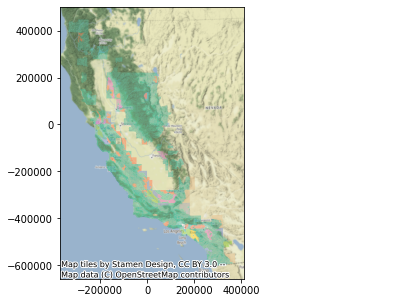

In [ ]:
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='AREA_HA')
# now we add a basemap. ctx finds a basemap for a background from
# an online repository.
# It assumes the data is in web mercator (epsg:3857) unless you specify otherwise
ctx.add_basemap(ax, crs=data.crs)

In [ ]:
#see the current coordinate reference system from .crs attribute
data.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Let's take a copy of our layer
data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=3857)

In [ ]:
data_proj.head(20)


In [ ]:
ax = df_cities_boundaries.plot(color='pink', edgecolor='black',zorder=1)

data_proj.plot(ax=ax, color='k',zorder=2);

## Ground Cover

In [ ]:
# Reading from a CSV file
ground_cover = pd.read_csv("/content/drive/MyDrive/FinalProject_implentation/county_vegetation.csv",header=0)

In [ ]:
Cal_fire = pd.read_csv("/content/drive/MyDrive/FinalProject_implentation/California_Fire_Incidents_2013.csv")

In [ ]:
ground_cover.head()

,Alfalfa & Hay_acres,Alfalfa & Hay_percentage,Almonds_acres,Almonds_percentage,Barren_acres,Barren_percentage,Corn_acres,Corn_percentage,Cotton_acres,Cotton_percentage,Deciduous Forest_acres,Deciduous Forest_percentage,Evergreen Forest_acres,Evergreen Forest_percentage,Fallow_acres,Fallow_percentage,Fruit Trees_acres,Fruit Trees_percentage,Grain Crops_acres,Grain Crops_percentage,Grapes_acres,Grapes_percentage,Grassland_acres,Grassland_percentage,High Intensity Developed_acres,High Intensity Developed_percentage,Low Intensity Developed_acres,Low Intensity Developed_percentage,Mixed Forest_acres,Mixed Forest_percentage,Other Ocean/Mexico_acres,Other Ocean/Mexico_percentage,Other Tree Crops_acres,Other Tree Crops_percentage,Other_acres,Other_percentage,Rice_acres,Rice_percentage,Shrubland_acres,Shrubland_percentage,Tomatoes_acres,Tomatoes_percentage,Vegs & Fruits_acres,Vegs & Fruits_percentage,Walnuts_acres,Walnuts_percentage,Water_acres,Water_percentage,Wetlands_acres,Wetlands_percentage,Winter Wheat_acres,Winter Wheat_percentage,county,max_elevation,min_elevation,year
0,1102.856805,0.300074,4.225505,0.001150,194.595625,0.052947,4.670295,0.001271,NaN,NaN,5.337480,0.001452,7838.756565,2.132827,1536.749450,0.418130,1.779160,0.000484,991.214515,0.269697,3722.447510,1.012831,153671.38670,41.812059,28431.421590,7.735834,39470.887000,10.739534,74885.956380,20.375531,NaN,NaN,8.673405,0.002360,NaN,NaN,0.889580,0.000242,30958.05119,8.423298,4.670295,0.001271,164.127510,0.044657,4.670295,0.001271,19403.51896,5.279454,4497.494085,1.223712,624.485160,0.169915,Alameda,1242,-42,2013
1,189.035750,0.040080,NaN,NaN,15482.472720,3.282650,NaN,NaN,NaN,NaN,194.595625,0.041259,195088.007500,41.363269,0.444790,0.000094,0.222395,0.000047,NaN,NaN,NaN,NaN,5644.82989,1.196837,121.427670,0.025746,3192.480225,0.676881,0.667185,0.000141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247783.39080,52.535935,NaN,NaN,NaN,NaN,NaN,NaN,2650.50361,0.561969,1297.452430,0.275091,NaN,NaN,Alpine,3556,1442,2013
2,1326.808570,0.414290,16.679625,0.005208,1873.010690,0.584840,242.632945,0.075761,NaN,NaN,17190.911110,5.367789,114386.866700,35.716810,168.130620,0.052498,12.009330,0.003750,120.093300,0.037499,2587.343430,0.807887,112912.61020,35.256480,440.119705,0.137425,8263.975805,2.580391,1727.119570,0.539286,NaN,NaN,1.334370,0.000417,NaN,NaN,1.111975,0.000347,52457.86542,16.379744,NaN,NaN,1.779160,0.000556,122.094855,0.038124,5822.74589,1.818128,105.860020,0.033054,479.483620,0.149717,Amador,3121,43,2013
3,3777.156680,0.374865,46196.556590,4.584787,1869.452370,0.185534,2023.349710,0.200808,9.118195,0.000905,33181.556400,3.293111,408193.790800,40.511281,56434.510410,5.600855,10563.317710,1.048359,2628.041715,0.260821,247.525635,0.024566,170758.21690,16.946936,4421.657390,0.438828,25520.048650,2.532743,165.684275,0.016443,NaN,NaN,790.391830,0.078443,NaN,NaN,105624.281300,10.482705,55372.12950,5.495419,94.295480,0.009358,469.475845,0.046593,42057.340850,4.173990,21360.37257,2.119915,11589.893030,1.150241,4257.085090,0.422495,Butte,2192,-1,2013
4,31.802485,0.005011,28.466560,0.004485,218.391890,0.034409,0.889580,0.000140,NaN,NaN,34882.878150,5.495994,255438.004300,40.245698,28.688955,0.004520,12.231725,0.001927,2.223950,0.000350,522.183460,0.082273,207502.76360,32.693230,465.027945,0.073268,12257.745220,1.931277,3351.270255,0.528012,NaN,NaN,0.889580,0.000140,NaN,NaN,NaN,NaN,106091.08840,16.715249,NaN,NaN,0.667185,0.000105,425.664030,0.067066,13178.68291,2.076376,245.079290,0.038614,11.786935,0.001857,Calaveras,3522,787,2013


In [ ]:
filtered_ground_cover = ground_cover[['Alfalfa & Hay_percentage','Deciduous Forest_percentage','Evergreen Forest_percentage',
                                      'Barren_percentage','Grassland_percentage','Wetlands_percentage','county','max_elevation','min_elevation']]

In [ ]:

filtered_ground_cover.rename(columns={'county': 'county_name'}, inplace=True)
filtered_ground_cover

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Alfalfa & Hay_percentage,Deciduous Forest_percentage,Evergreen Forest_percentage,Barren_percentage,Grassland_percentage,Wetlands_percentage,county_name,max_elevation,min_elevation
0,0.300074,0.001452,2.132827,0.052947,41.812059,1.223712,Alameda,1242,-42
1,0.040080,0.041259,41.363269,3.282650,1.196837,0.275091,Alpine,3556,1442
2,0.414290,5.367789,35.716810,0.584840,35.256480,0.033054,Amador,3121,43
3,0.374865,3.293111,40.511281,0.185534,16.946936,1.150241,Butte,2192,-1
4,0.005011,5.495994,40.245698,0.034409,32.693230,0.038614,Calaveras,3522,787
5,1.992021,0.101680,4.204467,0.192281,20.088950,2.448953,Colusa,1022,-9
6,4.582245,0.041374,0.958474,0.047405,43.166559,2.339854,Contra Costa,680,-30
7,NaN,1.276322,72.209797,0.100857,2.809837,0.794040,Del Norte,2215,120
8,0.000488,1.810572,64.507449,1.082822,8.840188,0.054721,El Dorado,3299,145
9,2.447318,0.032111,23.327179,7.029539,17.060541,0.212357,Fresno,4153,47


In [ ]:
df_california_cities_merged

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,OBJECTID,COUNTY,COPRI,SHAPE_Leng,SHAPE_Area,geometry,_merge
0,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491,240.0,Los Angeles County,19201,629927.649063,1.983350e+09,"POLYGON ((-13177364.151 4019274.177, -13177364...",both
1,San Francisco,San Francisco,CA,California,6075,San Francisco,37.7562,-122.4430,3592294,7256,polygon,False,True,America/Los_Angeles,1,94130 94131 94132 94133 94134 94109 94108 9410...,1840021543,370.0,San Francisco County,38001,203595.116213,9.636207e+08,"MULTIPOLYGON (((-13685587.506 4539292.679, -13...",both
2,San Diego,San Diego,CA,California,6073,San Diego,32.8312,-117.1225,3220118,1686,polygon,False,True,America/Los_Angeles,1,92109 92108 92103 92111 92154 92110 92115 9214...,1840021990,367.0,San Diego County,37008,444298.595461,1.536273e+09,"MULTIPOLYGON (((-13016103.140 3843864.624, -13...",both
3,Riverside,Riverside,CA,California,6065,Riverside,33.9381,-117.3948,2107852,1574,polygon,False,True,America/Los_Angeles,1,92508 92503 92501 92505 92504 92507 92506 9250...,1840020551,352.0,Riverside County,33009,125771.979655,3.076189e+08,"POLYGON ((-13059305.222 4013318.743, -13059305...",both
4,Sacramento,Sacramento,CA,California,6067,Sacramento,38.5667,-121.4683,1898019,2029,polygon,False,True,America/Los_Angeles,1,95820 95838 95832 95833 95831 95834 95835 9581...,1840021491,360.0,Sacramento County,34003,198235.431439,4.270073e+08,"POLYGON ((-13523573.510 4675091.760, -13523562...",both
5,San Jose,San Jose,CA,California,6085,Santa Clara,37.3019,-121.8486,1798103,2218,polygon,False,True,America/Los_Angeles,1,95118 95128 95124 95125 95123 95008 95002 9511...,1840021570,374.0,Santa Clara County,43017,558536.269023,7.406854e+08,"MULTIPOLYGON (((-13556743.895 4476110.004, -13...",both
6,Fresno,Fresno,CA,California,6019,Fresno,36.7831,-119.7941,703498,1789,polygon,False,True,America/Los_Angeles,2,93730 93650 93702 93703 93701 93706 93704 9370...,1840020319,151.0,Fresno County,10005,443810.839545,4.728606e+08,"MULTIPOLYGON (((-13345520.510 4398237.546, -13...",both
7,Concord,Concord,CA,California,6013,Contra Costa,37.9722,-122.0016,652308,1633,polygon,False,True,America/Los_Angeles,2,94518 94519 94521 94520 94522 94524 94527,1840018905,90.0,Contra Costa County,07002,72311.763778,1.274901e+08,"POLYGON ((-13583146.276 4582484.606, -13583061...",both
8,Mission Viejo,Mission Viejo,CA,California,6059,Orange,33.6095,-117.6550,590249,2058,polygon,False,True,America/Los_Angeles,2,92692 92691 92690,1840020580,263.0,Orange County,30027,47273.054998,6.740072e+07,"POLYGON ((-13093355.369 3984944.796, -13093394...",both
9,Bakersfield,Bakersfield,CA,California,6029,Kern,35.3529,-119.0359,579295,990,polygon,False,True,America/Los_Angeles,2,93306 93307 93304 93305 93301 93309 93314 9331...,1840019148,27.0,Kern County,15001,539941.602332,5.901339e+08,"MULTIPOLYGON (((-13241449.989 4192271.937, -13...",both


In [ ]:
merged_ground_cover = df_california_cities_merged.merge(filtered_ground_cover, how='left', on='county_name')

In [ ]:
merged_ground_cover.head()
merged_ground_cover.to_csv(r'/content/drive/MyDrive/FinalProject_implentation/merged_vegetation.csv', index = True)

In [ ]:
data.head()

,AREA_HA,WHR1,WHR1_TYPE,geometry
0,2.883996,BOP,Blue Oak-Foothill Pine,"POLYGON ((-108146.642 -84629.692, -108103.152 ..."
1,1.214535,COW,Coastal Oak Woodland,"POLYGON ((-111181.503 -111958.328, -111179.629..."
2,15.093523,BOW,Blue Oak Woodland,"POLYGON ((-99231.277 -112388.975, -99508.256 -..."
3,4.003626,COW,Coastal Oak Woodland,"POLYGON ((-109209.621 -112290.439, -109294.941..."
4,9.156008,VOW,Valley Oak Woodland,"POLYGON ((-108552.277 -111986.809, -108615.767..."


# Wildfire Hisotry data

In [ ]:
import datetime
from jdcal import jd2gcal
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import xarray as xr
import altair as alt

import sqlite3
#import os.path

input_filename ='/content/drive/MyDrive/FinalProject_implentation/FPA_FOD_20170508.sqlite'
conn = sqlite3.connect(input_filename)
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [
          v[0] for v in cursor.fetchall()
          if v[0] != "sqlite_sequence"
    ]
print(tables)




['spatial_ref_sys', 'spatialite_history', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'ElementaryGeometries', 'KNN', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109']


In [ ]:
query1 = '''select * from fires;'''
df_raw = pd.read_sql_query(query1, conn)
df_raw.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [ ]:
# Data Cleaning
drop_columns = ['OBJECTID',
                'FOD_ID',
                'FPA_ID',
                'SOURCE_SYSTEM_TYPE',
                'SOURCE_SYSTEM',
                'NWCG_REPORTING_AGENCY',
                'NWCG_REPORTING_UNIT_ID', 
                'NWCG_REPORTING_UNIT_NAME',
                'SOURCE_REPORTING_UNIT',
                'SOURCE_REPORTING_UNIT_NAME',
                'LOCAL_FIRE_REPORT_ID',
                'LOCAL_INCIDENT_ID',
                'ICS_209_INCIDENT_NUMBER',
                'ICS_209_NAME',
                'MTBS_ID',
                'MTBS_FIRE_NAME',
                'COMPLEX_NAME',
                'OWNER_CODE',          
                'OWNER_DESCR',        
                'Shape']
df_CA = df_raw[df_raw.STATE == 'CA'].drop(columns=drop_columns)
df_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189550 entries, 0 to 1880464
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FIRE_CODE         55533 non-null   object 
 1   FIRE_NAME         174557 non-null  object 
 2   FIRE_YEAR         189550 non-null  int64  
 3   DISCOVERY_DATE    189550 non-null  float64
 4   DISCOVERY_DOY     189550 non-null  int64  
 5   DISCOVERY_TIME    110217 non-null  object 
 6   STAT_CAUSE_CODE   189550 non-null  float64
 7   STAT_CAUSE_DESCR  189550 non-null  object 
 8   CONT_DATE         91908 non-null   float64
 9   CONT_DOY          91908 non-null   float64
 10  CONT_TIME         91217 non-null   object 
 11  FIRE_SIZE         189550 non-null  float64
 12  FIRE_SIZE_CLASS   189550 non-null  object 
 13  LATITUDE          189550 non-null  float64
 14  LONGITUDE         189550 non-null  float64
 15  STATE             189550 non-null  object 
 16  COUNTY            5

In [ ]:
df_CA.head()

In [ ]:
# The DISCOVERY_DATE field is in Julian Date format. Converting this to Gregorian dates
df_CA['DATE'] = pd.to_datetime(df_CA['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df_CA.head()

,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DATE
0,BJ8K,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,CA,63,063,Plumas,2005-02-02
1,AAC0,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,CA,61,061,Placer,2004-05-12
2,A32W,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,CA,17,017,El Dorado,2004-05-31
3,None,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,CA,3,003,Alpine,2004-06-28
4,None,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,CA,3,003,Alpine,2004-06-28


In [ ]:
# Extracting month and year from date

df_CA['MONTH'] = df_CA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_CA['DAY'] = df_CA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_CA.head(2)


,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DATE,MONTH,DAY
0,BJ8K,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,CA,63,063,Plumas,2005-02-02,2,2
1,AAC0,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,CA,61,061,Placer,2004-05-12,5,12


In [ ]:
# Count of Fires 
fires = df_raw
count = pd.DataFrame(fires.groupby(['STAT_CAUSE_DESCR']).OBJECTID.count().sort_values(ascending=False)).reset_index()

count.rename(columns={'OBJECTID': 'num_fires'}, inplace=True)

alt.Chart(count).mark_bar().encode(
    alt.X('STAT_CAUSE_DESCR', sort='-y', title='Cause of Fire'),
    alt.Y('num_fires', title='Number of Fires'),
).properties(title=f'Number of Fires and Causes of Fires',
    width=400,
    height=300
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)

alt.Chart(...)

In [ ]:
# Count of Fires larger than 500 Acres


large_fire = df_raw[df_raw.FIRE_SIZE>500]
large_fire_count = pd.DataFrame(large_fire.groupby(['STAT_CAUSE_DESCR']).OBJECTID.count().sort_values(ascending=False)).reset_index()

large_fire_count.rename(columns={'OBJECTID': 'number'}, inplace=True)
alt.Chart(large_fire_count).mark_bar(color="Orange").encode(
    alt.X('STAT_CAUSE_DESCR', sort='-y', title='Cause of Fire'),
    alt.Y('number', title='Number of Large Fires'),
).properties(title=f'Number of Fires Larger than 500 Acres',
    width=400,
    height=300
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)

alt.Chart(...)

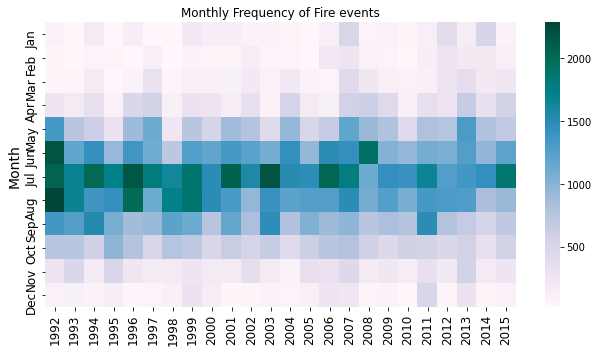

In [ ]:
df_monthly = df_CA.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[9,5])
sns.heatmap(df_monthly, cmap='PuBuGn')
plt.yticks(np.arange(0.5,12.5), labels=month, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=14)
plt.title('Monthly Frequency of Fire events', fontsize=12)
plt.tight_layout()

In [ ]:
# Query to list state in descending order of Fire Frequency...
query_count = '''select FIPS_NAME, FIPS_CODE, COUNT(FIPS_CODE) AS 'Fire Count' from fires where STATE like 'CA' group by FIPS_NAME order BY COUNT(FIPS_CODE) DESC;'''
df_count = pd.read_sql_query(query_count, conn)

# Chart represenation 
alt.Chart(df_count).mark_bar(color="blue").encode(
    alt.X('FIPS_NAME', sort='-y', title='Cause of Fire'),
    alt.Y('Fire Count', title='Number of Large Fires'),
).properties(title=f'Number of Fires Larger than 500 Acres',
    width=700,
    height=300
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)


alt.Chart(...)

In [ ]:
# Frequency of fires countywise
df_count.head()

,FIPS_NAME,FIPS_CODE,Fire Count
0,Riverside,065,6925
1,Los Angeles,037,2703
2,El Dorado,017,2676
3,San Bernardino,071,2642
4,San Diego,073,2443


# Effect of Population and Area of Land on Fire Frequnecy

In [ ]:
# Population density is stored inside a csv file
county_density = pd.read_excel('/content/drive/MyDrive/FinalProject_implentation/county_poulation.xlsx')
county_density.head()

,PopulationDensity(sq/mi),County
0,3575.3,San Francisco
1,3255.4,Orange
2,2099.4,Los Angeles
3,1898.5,Alameda
4,1459.0,Sacramento


In [ ]:
# Fetching the detials of county from census.gov
county_df = gpd.read_file("/content/drive/MyDrive/FinalProject_implentation/cb_2019_us_county_5m/cb_2019_us_county_5m.shp")
county_df.head()

NameError: ignored

In [ ]:
#california code = 06
# Extracting records for California
county_df = county_df.query("STATEFP == '06'")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
24,06,069,00277299,0500000US06069,06069,San Benito,06,3596591082,4719300,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."
101,06,091,00277310,0500000US06091,06091,Sierra,06,2468694583,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5..."
141,06,079,00277304,0500000US06079,06079,San Luis Obispo,06,8548557892,815573121,"POLYGON ((-121.34636 35.79518, -120.75065 35.7..."
217,06,005,01675841,0500000US06005,06005,Amador,06,1539933596,29470567,"POLYGON ((-121.02751 38.50829, -121.00754 38.5..."
230,06,053,00277291,0500000US06053,06053,Monterey,06,8499616876,1267800137,"POLYGON ((-121.97859 36.58049, -121.97043 36.5..."


In [ ]:
# cleaning
county_density["County"] = county_density["County"].str.title()
county_density["County"] = county_density["County"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

# Merging using inner join
county_details = county_df.merge(county_density, left_on="NAME", right_on="County", how="inner")
county_details.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,PopulationDensity(sq/mi),County
0,06,069,00277299,0500000US06069,06069,San Benito,06,3596591082,4719300,"POLYGON ((-121.64400 36.89400, -121.62946 36.9...",40.9,San Benito
1,06,091,00277310,0500000US06091,06091,Sierra,06,2468694583,23299110,"POLYGON ((-121.05820 39.53704, -121.04745 39.5...",3.1,Sierra
2,06,079,00277304,0500000US06079,06079,San Luis Obispo,06,8548557892,815573121,"POLYGON ((-121.34636 35.79518, -120.75065 35.7...",75.8,San Luis Obispo
3,06,005,01675841,0500000US06005,06005,Amador,06,1539933596,29470567,"POLYGON ((-121.02751 38.50829, -121.00754 38.5...",61.3,Amador
4,06,053,00277291,0500000US06053,06053,Monterey,06,8499616876,1267800137,"POLYGON ((-121.97859 36.58049, -121.97043 36.5...",112.7,Monterey


In [ ]:

county_details["County"] = county_details["County"].str.title()
county_details["County"] = county_details["County"].str.strip()
df_count["FIPS_NAME"] = df_count["FIPS_NAME"].str.title()
df_count["FIPS_NAME"] = df_count["FIPS_NAME"].str.strip()

res_states = df_count.merge(county_details, left_on="FIPS_NAME", right_on="County", how="inner")
res_states.head()


,FIPS_NAME,FIPS_CODE,Fire Count,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,PopulationDensity(sq/mi),County
0,Riverside,065,6925,06,065,00277297,0500000US06065,06065,Riverside,06,18671212657,243883196,"POLYGON ((-117.67629 33.88882, -117.65489 33.8...",310.4,Riverside
1,Los Angeles,037,2703,06,037,00277283,0500000US06037,06037,Los Angeles,06,10511861492,1793485467,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",2099.4,Los Angeles
2,El Dorado,017,2676,06,017,00277273,0500000US06017,06017,El Dorado,06,4423299441,203342316,"POLYGON ((-121.13451 38.71203, -121.10300 38.7...",101.6,El Dorado
3,San Bernardino,071,2642,06,071,00277300,0500000US06071,06071,San Bernardino,06,51975576263,96414425,"POLYGON ((-117.78506 34.00481, -117.76748 34.0...",103.4,San Bernardino
4,San Diego,073,2443,06,073,00277301,0500000US06073,06073,San Diego,06,10904373558,817404622,"POLYGON ((-117.59616 33.38709, -117.57848 33.4...",703.4,San Diego


# Merging the dataframes

In [ ]:
# Merging the Vegetation data
res_states.rename(columns={'FIPS_NAME': 'county_name'}, inplace=True)
merged_data = res_states.merge(filtered_ground_cover, on='county_name', how='left', indicator=True)


In [ ]:
merged_data.head()

In [ ]:
sorted_res = merged_data.sort_values(by='Fire Count', ascending=False)
sorted_res.head()

,county_name,FIPS_CODE,Fire Count,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,PopulationDensity(sq/mi),County,Alfalfa & Hay_percentage,Deciduous Forest_percentage,Evergreen Forest_percentage,Barren_percentage,Grassland_percentage,Wetlands_percentage,max_elevation,min_elevation,_merge
0,Riverside,065,6925,06,065,00277297,0500000US06065,06065,Riverside,06,18671212657,243883196,"POLYGON ((-117.67629 33.88882, -117.65489 33.8...",310.4,Riverside,1.428608,0.008060,2.095520,6.768504,6.529777,0.233030,3263,-81,both
1,Los Angeles,037,2703,06,037,00277283,0500000US06037,06037,Los Angeles,06,10511861492,1793485467,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",2099.4,Los Angeles,0.066988,0.002494,4.843746,3.594006,9.303955,0.087450,3032,69,both
2,El Dorado,017,2676,06,017,00277273,0500000US06017,06017,El Dorado,06,4423299441,203342316,"POLYGON ((-121.13451 38.71203, -121.10300 38.7...",101.6,El Dorado,0.000488,1.810572,64.507449,1.082822,8.840188,0.054721,3299,145,both
3,San Bernardino,071,2642,06,071,00277300,0500000US06071,06071,San Bernardino,06,51975576263,96414425,"POLYGON ((-117.78506 34.00481, -117.76748 34.0...",103.4,San Bernardino,0.022024,0.000632,1.814040,10.975012,0.871968,0.040986,3493,-3,both
4,San Diego,073,2443,06,073,00277301,0500000US06073,06073,San Diego,06,10904373558,817404622,"POLYGON ((-117.59616 33.38709, -117.57848 33.4...",703.4,San Diego,0.002388,0.000304,1.977795,8.911958,9.654737,0.444967,1981,-72,both


In [ ]:
sorted_res = sorted_res[['Fire Count','ALAND','PopulationDensity(sq/mi)','Alfalfa & Hay_percentage','Deciduous Forest_percentage',
                      'Evergreen Forest_percentage','max_elevation',]]

sorted_res = sorted_res.head(15)
sorted_res.head

<bound method NDFrame.head of     Fire Count        ALAND  ...  Evergreen Forest_percentage  max_elevation
0         6925  18671212657  ...                     2.095520           3263
1         2703  10511861492  ...                     4.843746           3032
2         2676   4423299441  ...                    64.507449           3299
3         2642  51975576263  ...                     1.814040           3493
4         2443  10904373558  ...                     1.977795           1981
5         2183  15432139300  ...                    23.327179           4153
6         2156  16261933244  ...                    63.172230           4294
7         2118   9778407493  ...                    56.550943           3159
8         1768   4238488156  ...                    40.511281           2192
9         1737  21062540828  ...                     5.904497           2689
10        1689   3644306246  ...                    59.996509           2787
11        1552  11761615584  ...              

# Relationship between various Factors

In [ ]:
# https://www.pluralsight.com/guides/finding-relationships-data-with-python
sorted_res.corr()

,Fire Count,ALAND,PopulationDensity(sq/mi),Alfalfa & Hay_percentage,Deciduous Forest_percentage,Evergreen Forest_percentage,max_elevation
Fire Count,1.000000,0.269163,0.182661,-0.208967,-0.251046,-0.302647,0.156816
ALAND,0.269163,1.000000,-0.064595,-0.170162,-0.461079,-0.445257,0.237080
PopulationDensity(sq/mi),0.182661,-0.064595,1.000000,-0.218327,-0.259688,-0.392727,-0.117146
Alfalfa & Hay_percentage,-0.208967,-0.170162,-0.218327,1.000000,-0.318968,-0.266049,-0.508325
Deciduous Forest_percentage,-0.251046,-0.461079,-0.259688,-0.318968,1.000000,0.661888,-0.030391
Evergreen Forest_percentage,-0.302647,-0.445257,-0.392727,-0.266049,0.661888,1.000000,0.416600
max_elevation,0.156816,0.237080,-0.117146,-0.508325,-0.030391,0.416600,1.000000


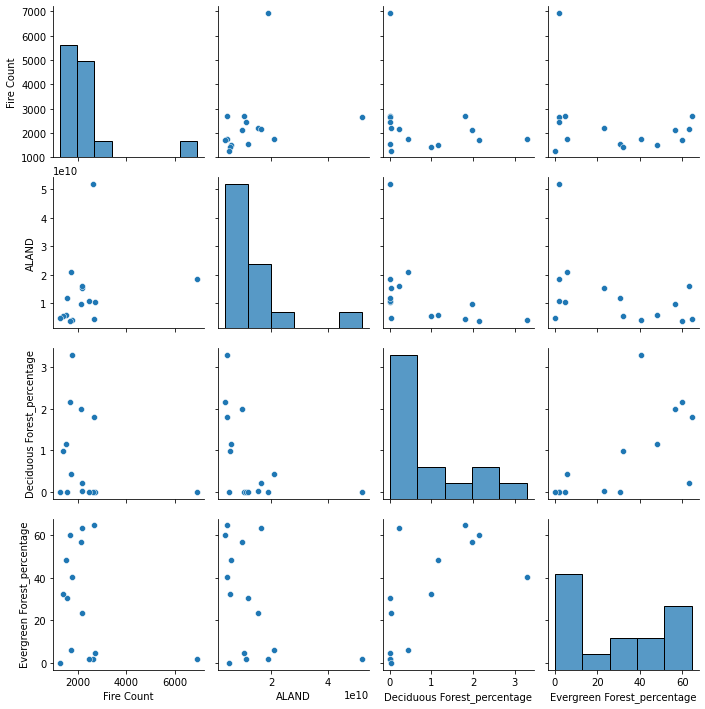

In [ ]:
sorted_res_drop = sorted_res.dropna()
df = sorted_res_drop[['Fire Count','ALAND','Deciduous Forest_percentage',
                      'Evergreen Forest_percentage']]

sns.pairplot(df, kind="scatter")
plt.show()

## Correlation Test

# New Section

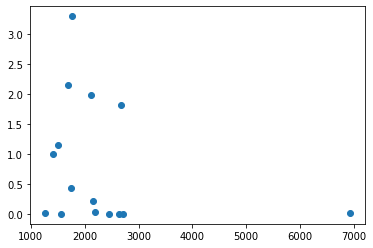

In [ ]:
plt.scatter(sorted_res_drop['Fire Count'], sorted_res_drop['Deciduous Forest_percentage'])
plt.show()

In [ ]:
from scipy.stats import linregress
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['PopulationDensity(sq/mi)'])

LinregressResult(slope=0.07137697397314635, intercept=117.26629020732418, rvalue=0.18266069261307194, pvalue=0.514668467665985, stderr=0.10655470472290707)

In [ ]:
from scipy.stats import linregress
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['ALAND'])

LinregressResult(slope=2402842.45944794, intercept=7427043907.815895, rvalue=0.26916331282785416, pvalue=0.3320011264693945, stderr=2384551.362659349)

In [ ]:
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['Alfalfa & Hay_percentage'])

LinregressResult(slope=-0.00037807603807921267, intercept=2.4960801291495134, rvalue=-0.20896657319879366, pvalue=0.4548079798699378, stderr=0.0004907216521418503)

In [ ]:
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['Deciduous Forest_percentage'])

LinregressResult(slope=-0.00019396310256072119, intercept=1.256101128443443, rvalue=-0.25104565295451375, pvalue=0.3667802896657548, stderr=0.0002074239940349028)

In [ ]:
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['Evergreen Forest_percentage'])

LinregressResult(slope=-0.005593261382181523, intercept=42.03165546164964, rvalue=-0.302646943003576, pvalue=0.2728914028372181, stderr=0.004885363285388898)

In [ ]:
linregress(sorted_res_drop['Fire Count'], sorted_res_drop['max_elevation'])

LinregressResult(slope=0.11208157980488428, intercept=2771.4167320470233, rvalue=0.156816408517549, pvalue=0.5767557266719021, stderr=0.19577821191866504)